# The optimal stopping problem

Even with 20000 users we have to do $4x10^{8}$ pair calculations. We should reduce again the data, so we
need to state a hypotesis.

Lets sort again the users by number of places visited in descending order.

**Hypotesis:**

If I calculate the air score for users with lower number of places visited, will the score decrease?

Let's call $d=i(j-i)$ the deep into the upper pair matrix starting the users with most locations visited.

In [1]:
import pandas as pd
import pickle
import multiprocessing as mp

# read the pickle files
pickle_off = open("edges.pickle","rb")
G = pickle.load(pickle_off)
pickle_off = open("reduced_data.pickle","rb")
cut_table = pickle.load(pickle_off)

In [30]:
#ids = tuple(cut_table.user.value_counts().index)
user_locations = cut_table.groupby(['user', 'location id']).size().reset_index(name='counts')
ids = tuple(user_locations.user.value_counts().index)
def get_score(x):
    s_table = cut_table[cut_table.user==x[0]]
    t_table = cut_table[cut_table.user==x[1]]
    share = set(s_table['location id']).intersection(t_table['location id'])
    st, ts = 0, 0
    if len(share) > 10:
        for i in share:
            time1 = s_table[s_table['location id']==i]['check-in time'].max()
            time2 = t_table[t_table['location id']==i]['check-in time'].min()
            if time2 < time1:
                st += 1
            if time2 > time1:
                ts += 1
        return f'{x[0]}-{x[1]}', max(st, ts)

In [ ]:
l, L = 700, 800
deep = []
scores = []
for i in range(l, L-1):
    print(i)
    a = ids[i]
    for j in range(i+1, L):
        b = ids[j]
        re = get_score((a, b))
        if re != None:
            deep.append((i+1)*(j-i))
            scores.append(re[1])

In [28]:
import matplotlib.pyplot as plt 
%matplotlib notebook

<IPython.core.display.Javascript object>


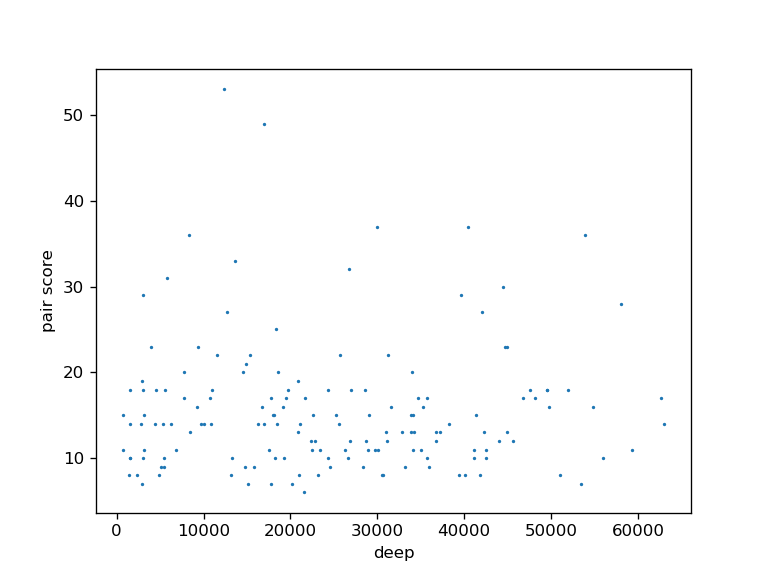

In [49]:
plt.figure()
plt.scatter(deep, scores, s=1)
plt.ylabel('pair score')
plt.xlabel('deep')
plt.show()

In the last graph we explore the pair scores from the 700th user to the 800th user. We can see that at this deep the maximum score is not larger than 60.

In [58]:
L = 400 
deep = []
scores = []
label = []
pair = []
for i in range(L-1):
    a = ids[i]
    for j in range(i+1, L, 4):
        b = ids[j]
        re = get_score((a, b))
        if re != None:
            deep.append((i+1)*(j-i))
            scores.append(re[1])
            pair.append()
            if (a, b) in G.edges(): # ask if are friends
                label.append('friends')
            else:
                label.append('non')

<IPython.core.display.Javascript object>


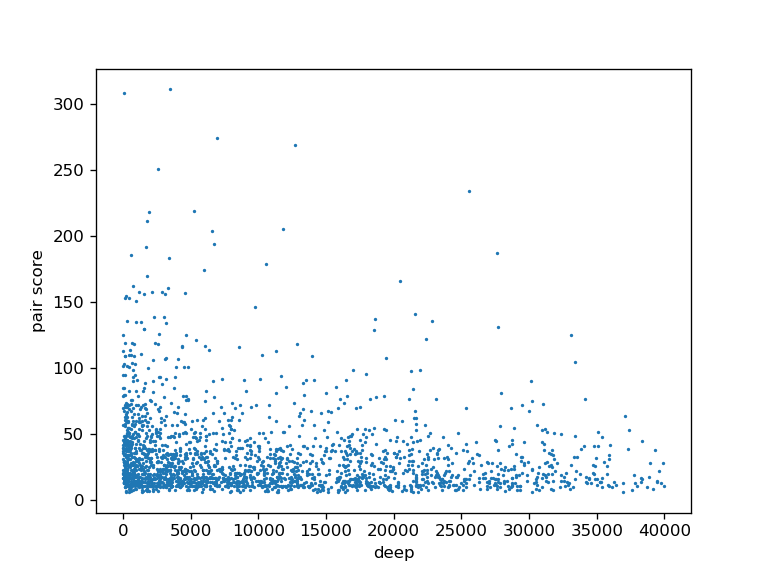

In [59]:
plt.figure()
plt.scatter(deep, scores, s=1)
plt.ylabel('pair score')
plt.xlabel('deep')
plt.show()

In the last graph we explore for the 400 users. We can see our hypotesis is true, the pair score decrases as we are going deep  evaluating 
users with lower locations visited.

# Answer

With the script `pair_scores.py`(18 minutes of computation) for the top 500 locations users, the highest non-friends and friends pair scores are:

1. **non-friends:** 1251-106819 	with stalker score 370
2. **friends:** 10410-10393 	with stalker score 365

In [91]:
non = pd.read_csv('pair_scores.csv')

In [92]:
non.sort_values('score', ascending = False)

,pair,score,friends
991,1251-106819,370,non
5221,10410-10393,365,friends
6228,18446-106815,326,friends
1701,19769-1725,311,non
320,130-6207,308,friends
4487,49804-1827,299,friends
2160,6155-6156,292,friends
3724,1426-106819,283,non
4658,117729-3412,282,non
3176,1404-1080,280,non
